# I am using the Heart Disease data set from the UCI repository to predict whether people develop heart disease. 

### In lieu of using the available processed data with 14 attributes in CSV format, I am starting with the complete dataset of 76 attributes. 

   #### Task1: Put data in dataframe and remove irrelevant columns. 
   #### Task2: Look for NaNs or missing values. Missing value imputation if needed. 
   #### Task3: Explore data - see which fetaures are relevant. 
   #### Task4: Check for imbalanced class set. If present, deal with this. 
   #### Task4: Exploring models and feature importance
   #### Task5: Train and test the selected model
   #### Task6: Hyperparameter optimization - fine tuning the model.

### Task 1 Getting data together

In [1]:
import io
import requests
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data = r.text.replace('\n', ' ').replace(' name ', ' name\n')

hungary = pd.read_table(io.StringIO(data), sep='\s+', header=None)
print(hungary)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    1254   0  40   1   1   0   0  -9   2  140  ...   -9  -9   1   1   1   1   
1    1255   0  49   0   1   0   0  -9   3  160  ...   -9  -9   1   1   1   1   
2    1256   0  37   1   1   0   0  -9   2  130  ...   -9  -9   1   1   1   1   
3    1257   0  48   0   1   1   1  -9   4  138  ...    2  -9   1   1   1   1   
4    1258   0  54   1   1   0   1  -9   3  150  ...    1  -9   1   1   1   1   
5    1259   0  39   1   1   0   1  -9   3  120  ...   -9  -9   1   1   1   1   
6    1260   0  45   0   0   1   0  -9   2  130  ...   -9  -9   1   1   1   1   
7    1261   0  54   1   1   0   0  -9   2  110  ...   -9  -9   1   1   1   1   
8    1262   0  37   1   1   1   1  -9   4  140  ...   -9  -9   1   1   1   1   
9    1263   0  48   0   1   0   0  -9   2  120  ...   -9  -9   1   1   1   1   
10   1264   0  37   0   1   0   1  -9   3  130  ...   -9  -9   1   1   1   1   
11   1265   0  58   1   1   0   0  -9   

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data1 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

lb = pd.read_table(io.StringIO(data1), sep='\s+', header=None)
print(lb)

      0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0      1   0  63   1   1   1   1  -9   4  140  ...    2   1   1   1   1   1   
1      2   0  44   1   1   1   1  -9   4  130  ...    1   1   1   1   1   1   
2      3   0  60   1   1   1   1  -9   4  132  ...    2   1   1   1   1   7   
3      4   0  55   1   1   1   1  -9   4  142  ...    1   1   1   1   1   1   
4      5   0  66   1   1   0   0  -9   3  110  ...    1   1   1   1   1   1   
5      6   0  66   1   1   0   1  -9   3  120  ...    1   1   1   1   1   1   
6      7   0  65   1   1   1   1  -9   4  150  ...    2   2   1   1   1   7   
7      8   0  60   1   1   0   0  -9   3  180  ...    1   1   1   1   1   1   
8      9   0  60   1   1   0   1  -9   3  120  ...    2   1   1   1   1   1   
9     10   0  60   1   0   0   0  -9   2  160  ...    1   1   1   1   1   1   
10    11   0  56   1   1   0   0  -9   2  126  ...    1   1   1   1   1   1   
11    12   0  59   1   1   1   1  -9   4  140  ...  

In [9]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data2 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

switz = pd.read_table(io.StringIO(data2), sep='\s+', header=None)
print(switz)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    3001   0  65   1   1   1   1  -9   4  115  ...    1   1   1   1   1   1   
1    3002   0  32   1   0   0   0  -9   1   95  ...    1   1   1   1   1   5   
2    3003   0  61   1   1   1   1  -9   4  105  ...    2   1   1   1   1   1   
3    3004   0  50   1   1   1   1  -9   4  145  ...    1   1   1   1   1   5   
4    3005   0  57   1   1   1   1  -9   4  110  ...    2   1   1   1   1   1   
5    3006   0  51   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
6    3007   0  47   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
7    3008   0  60   1   1   1   1  -9   4  160  ...    1   2  -9  -9  -9  -9   
8    3009   0  55   1   0   0   0  -9   2  140  ...    1   1   1   1   1   1   
9    3010   0  53   1   1   1   1  -9   4  125  ...    1   1   1   1   1   1   
10   3011   0  62   0   1   1   1  -9   4  120  ...    1   1   1   1   1   1   
11   3012   0  51   1   1   1   1  -9   

In [10]:
col_list = [2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57]
            
hungary=hungary[col_list]
lb = lb[col_list]
switz=switz[col_list]

In [11]:
switz.head(5) #Just checking to see I cut this down correctly

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,65,1,4,115,0,-9,0,-9,-9,0,93,56,185,80,1,0.0,2,-9,7,1
1,32,1,1,95,0,-9,-9,-9,-9,0,127,74,160,75,0,0.7,1,-9,-9,1
2,61,1,4,105,0,-9,-9,-9,-9,0,110,70,155,90,1,1.5,1,-9,-9,1
3,50,1,4,145,0,-9,-9,-9,-9,0,139,82,180,95,1,0.7,2,-9,-9,1
4,57,1,4,110,0,-9,-9,-9,-9,1,131,71,145,80,1,1.4,1,1,-9,3


In [12]:
frames = [hungary, lb, switz] #Now I want to merge all 3 dataframes and then I will label the columns
df = pd.concat(frames)
df #Why didn't merge work here? pd.merge produces the correct columns but 0 rows

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0
5,39,1,3,120,339,-9,0,-9,-9,0,170,86,198,100,0,0.0,-9,-9,-9,0
6,45,0,2,130,237,-9,0,-9,-9,0,170,90,200,106,0,0.0,-9,-9,-9,0
7,54,1,2,110,208,-9,0,-9,-9,0,142,56,220,70,0,0.0,-9,-9,-9,0
8,37,1,4,140,207,-9,0,-9,-9,0,130,63,190,100,1,1.5,2,-9,-9,1
9,48,0,2,120,284,-9,0,-9,-9,0,120,72,140,80,0,0.0,-9,-9,-9,0


In [13]:
df.columns=['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal','outcome']
#These are the new column labels

In [14]:
df.head(5) #yay - worked so far!

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


## Task 2: Looking for Null values or missing values

In [10]:
df.info() #So far everything is not null, but I'll come back to this as some of the negative numbers above are concerning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 20 columns):
age          617 non-null int64
sex          617 non-null int64
cp_type      617 non-null int64
rest_bp      617 non-null int64
chol         617 non-null int64
yrs_smoke    617 non-null int64
fbs          617 non-null int64
hist_dm      617 non-null int64
hist_cad     617 non-null int64
rest_ecg     617 non-null int64
max_hr       617 non-null int64
rest_hr      617 non-null int64
ex_bp1       617 non-null int64
ex_bp2       617 non-null int64
exang        617 non-null int64
oldpeak      617 non-null float64
slope        617 non-null int64
ca           617 non-null int64
thal         617 non-null int64
outcome      617 non-null int64
dtypes: float64(1), int64(19)
memory usage: 101.2 KB


## Task 3: Exploring the data

#### Are age and sex related to heart disease?

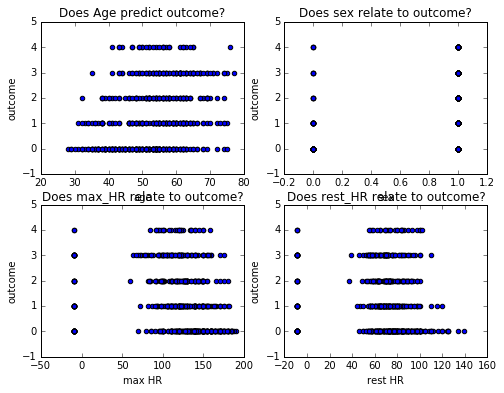

In [16]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
ax1.scatter(df.age,df.outcome)
plt.xlabel('age')
plt.ylabel('outcome')
plt.title('Does Age predict outcome?')

ax2 = fig.add_subplot(222)
ax2.scatter(df.sex,df.outcome)
plt.xlabel('sex')
plt.ylabel('outcome')
plt.title('Does sex relate to outcome?')

ax3 = fig.add_subplot(223)
ax3.scatter(df.max_hr,df.outcome)
plt.xlabel('max HR')
plt.ylabel('outcome')
plt.title('Does max_HR relate to outcome?')

ax4 = fig.add_subplot(224)
ax4.scatter(df.rest_hr,df.outcome)
plt.xlabel('rest HR')
plt.ylabel('outcome')
plt.title('Does rest_HR relate to outcome?')

/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/sheena/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


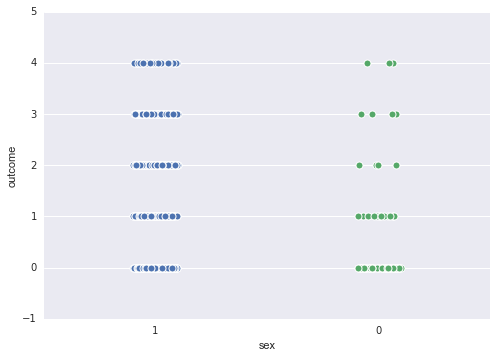

In [17]:
#trying a stripplot for sex - So this shows me that there are more males than females in the higher levels of heart disease 
import seaborn as sns
sns.stripplot(df.sex,df.outcome,jitter=True)

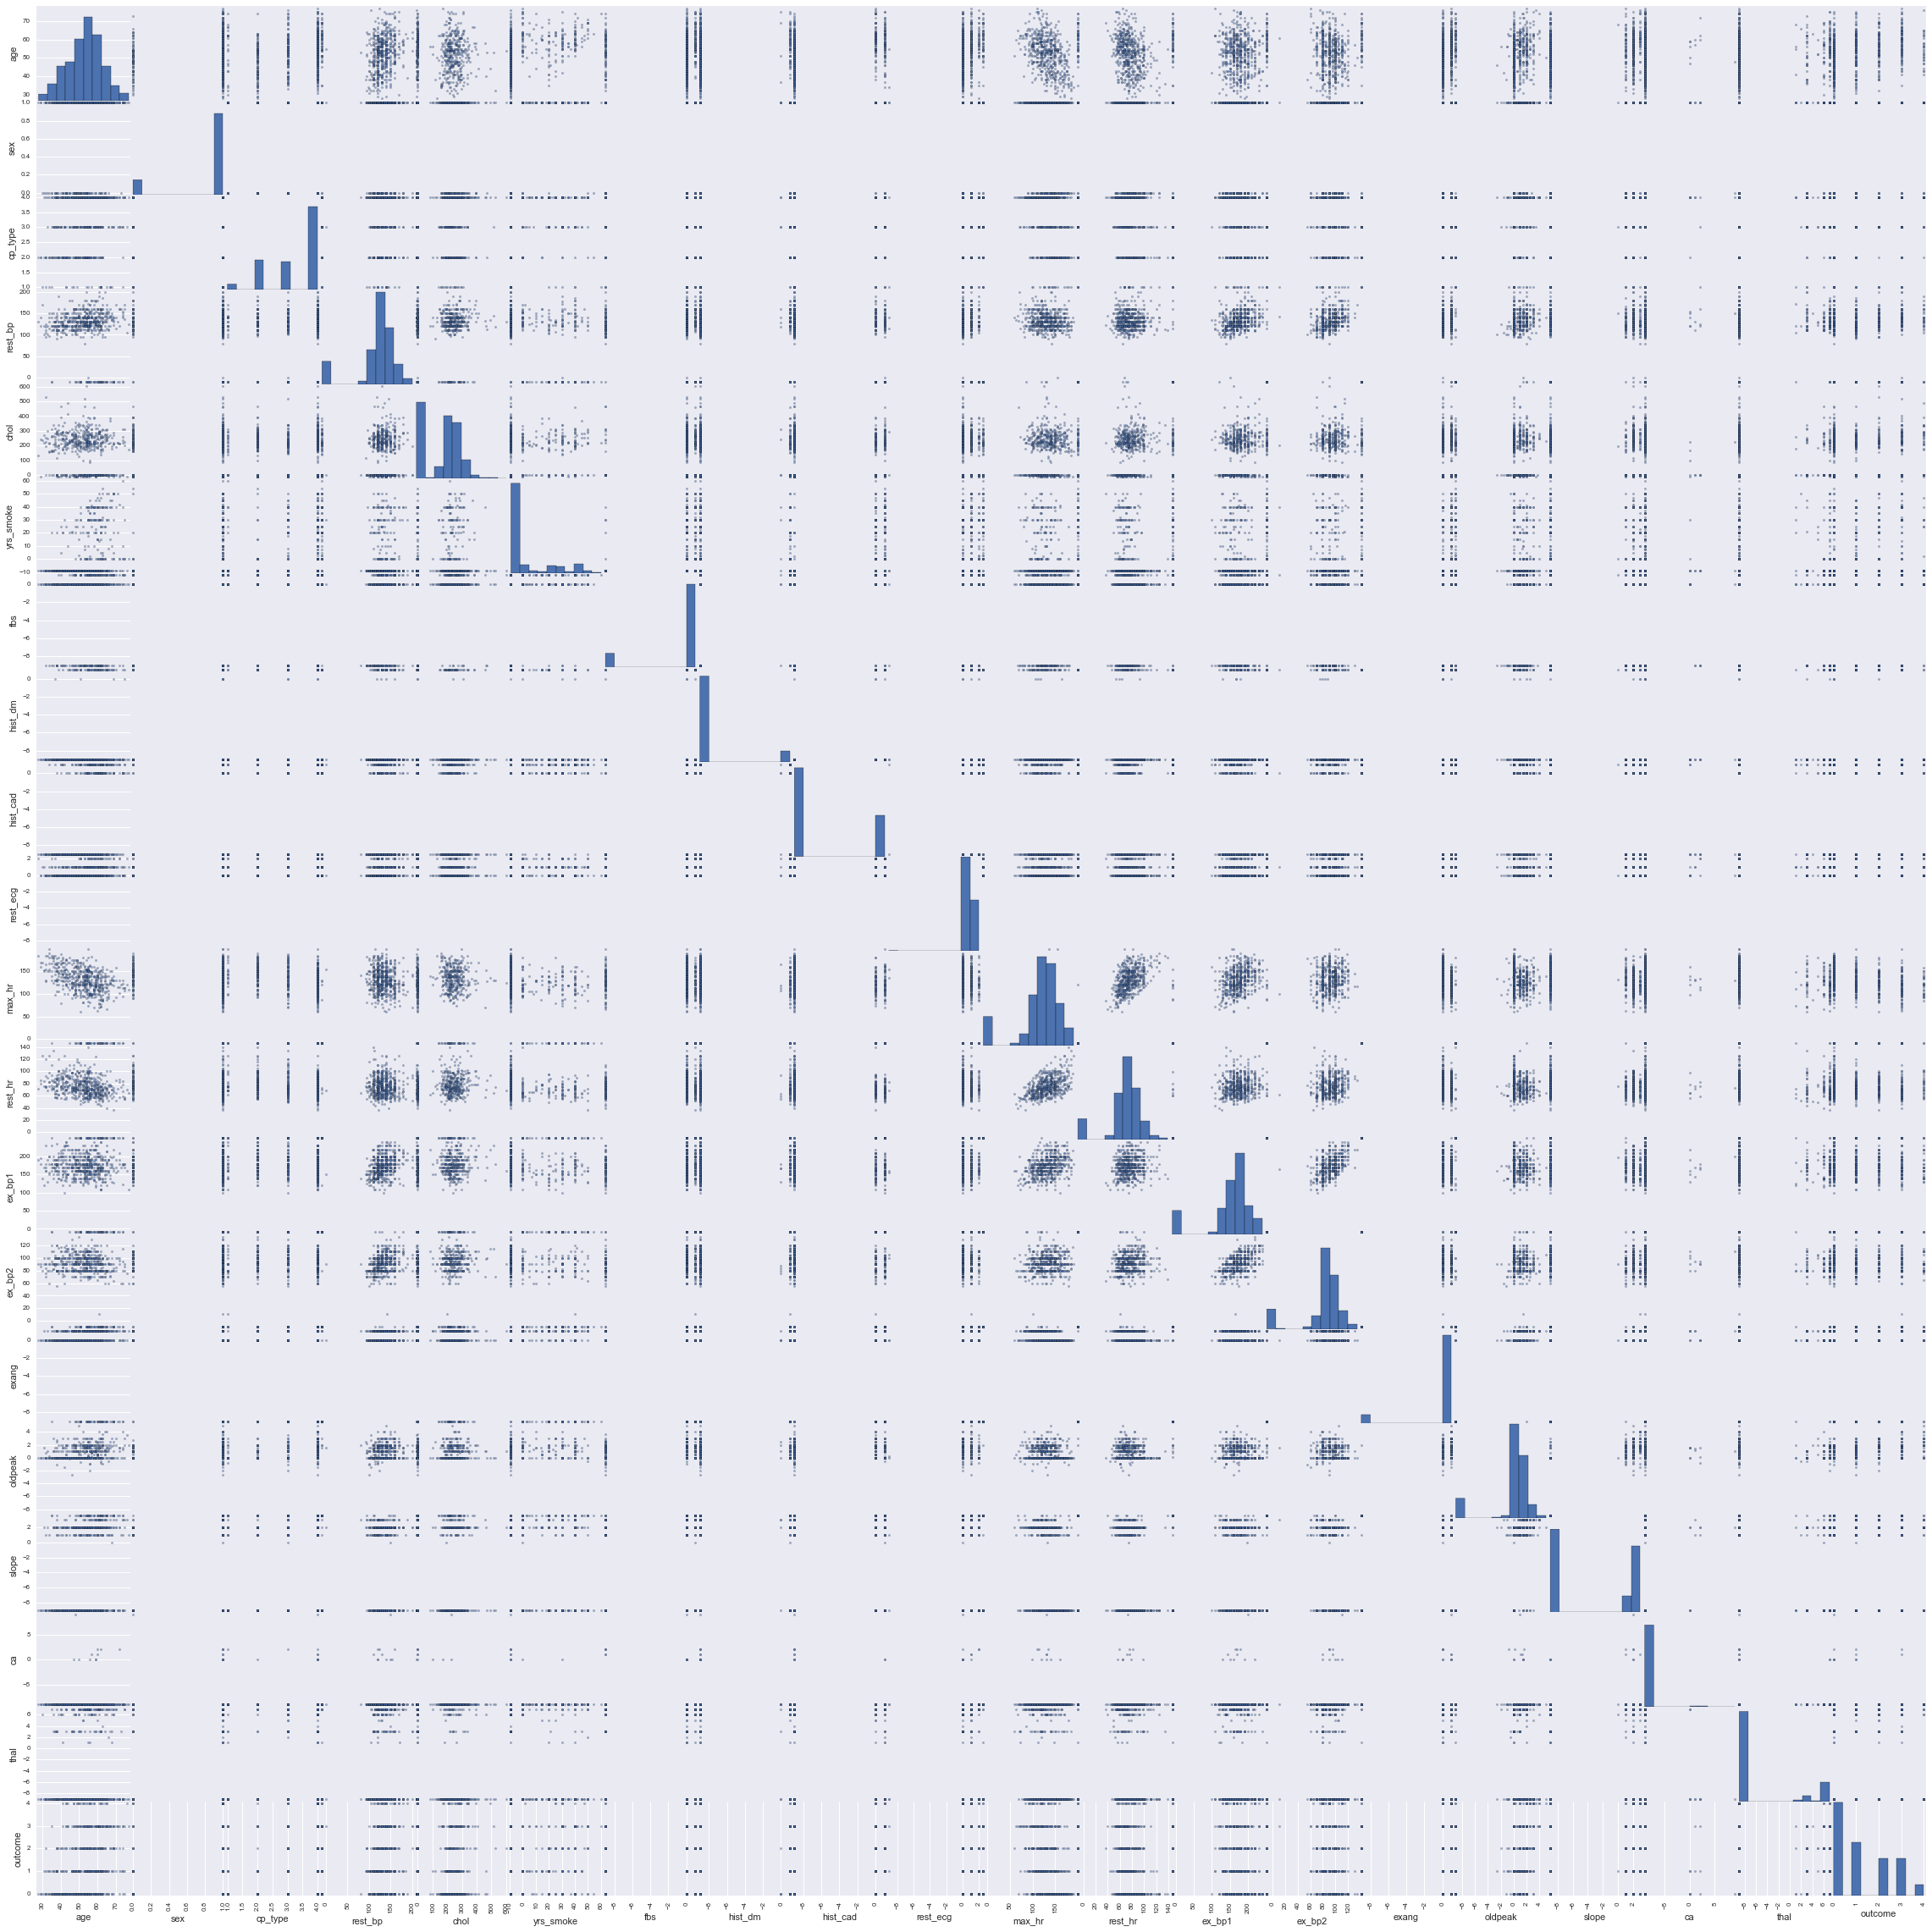

In [18]:
#Plotting one-by-one seems tedious. Lets try something different - is this overkill though? Do I need to normalize mean
#and stds for continous variables?
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(df, figsize=(40, 40))

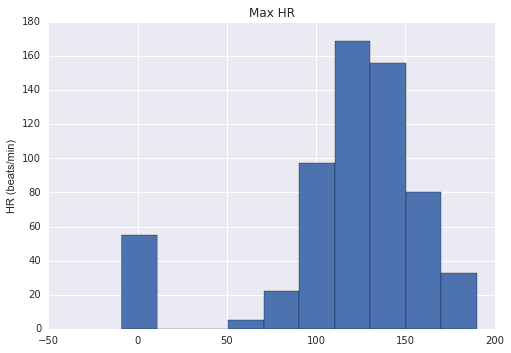

In [15]:
# Something funny is going on with the HRs - why are there negative numbers? Going to explore this
plt.hist(df.max_hr) # Need to find and drop these 0s 
plt.title('Max HR')
plt.ylabel('HR (beats/min)')

In [19]:
max_hr_null = df[df.max_hr.isnull()]
print max_hr_null #Nothing is null but maybe some are 0? 

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [20]:
max_hr_0 = df[df.max_hr == 0]
print max_hr_0 #Nothing is 0 so maybe some are negative?

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [18]:
max_hr_neg = df[df.max_hr <= 0]
print max_hr_neg #Nothing is 0 so maybe some are negative?

     age  sex  cp_type  rest_bp  chol  yrs_smoke  fbs  hist_dm  hist_cad  \
289   48    0        2       -9   308         -9    0       -9        -9   
13    63    1        3       -9     0          3    0       -9         1   
23    74    1        3       -9     0         40    0       -9         0   
26    51    1        4       -9     0         30    1        1         1   
29    55    1        3       -9   228         30    0       -9         0   
30    54    1        4       -9     0         40    0       -9         1   
36    60    1        4       -9   281         47    0       -9         0   
38    58    1        4       -9   203         40    1       -9         1   
44    57    1        4       -9   277         25    1       -9         1   
51    63    0        2       -9     0         54    0       -9         1   
57    60    1        3       -9   316         40    1       -9         0   
58    62    1        2       -9     0         15    0       -9         0   
60    51    

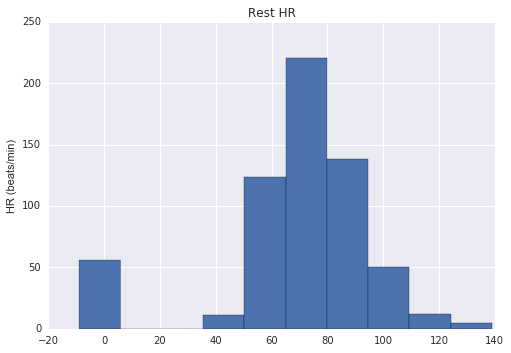

In [28]:
# does rest HR have negative numbers too?
plt.hist(df.rest_hr) # Need to find and drop these 0s 
plt.title('Rest HR')
plt.ylabel('HR (beats/min)')

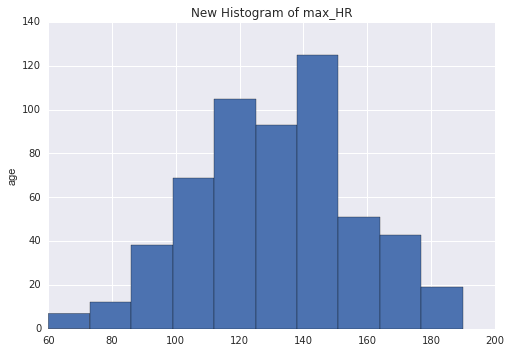

In [29]:
max_hr_pos = df[df.max_hr >= 0] #We don't want to eliminate the whole rows for the negative values, we just want to replace with Nan
plt.hist(max_hr_pos.max_hr)
plt.title('New Histogram of max_HR')
plt.ylabel('age')

In [30]:
rest_hr_pos = df[df.rest_hr >= 0] #Again just filtering out the negative ones for graphing purposes

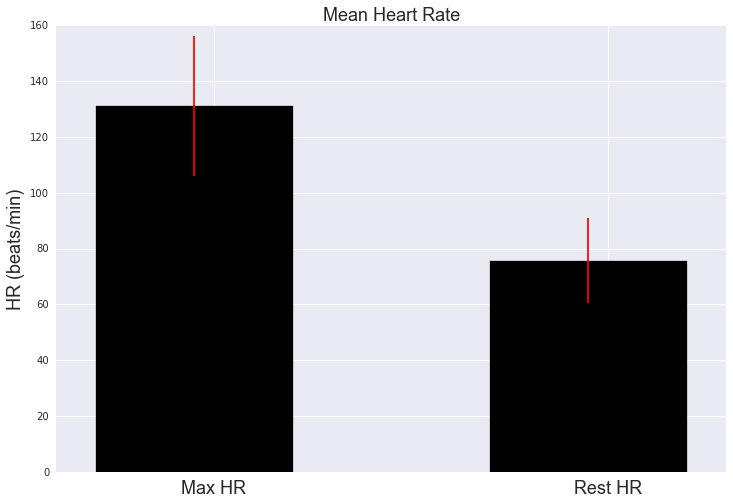

In [31]:
#Now I want to graph the mean MaxHR and RestHR on a bar graph. Im wondering if patients in this cohort have very similar
# rest and max HRs (I hypothesize that there rest heart rates are high and then when they exercise they achieve their max
# heart rate very quickly)
fig = plt.figure(figsize=(12,8)) #Plotting group mean results
ax = fig.add_subplot(111)
width = .5
means = [max_hr_pos['max_hr'].mean(), rest_hr_pos['rest_hr'].mean()]
std = [max_hr_pos['max_hr'].std(), rest_hr_pos['rest_hr'].std()]
ind = np.arange(len(means))
bar_p = plt.bar(ind, means, width, yerr = std, color = 'black', ecolor='red')

ax.set_title('Mean Heart Rate', fontsize=18)
xTickMarks = ['Max HR', 'Rest HR']
ax.set_xticks(ind+.3)
ax.set_xlim(-.1)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=18)
ax.set_ylabel('HR (beats/min)', fontsize=18)
fig.savefig('Max_Rest_HR.png')

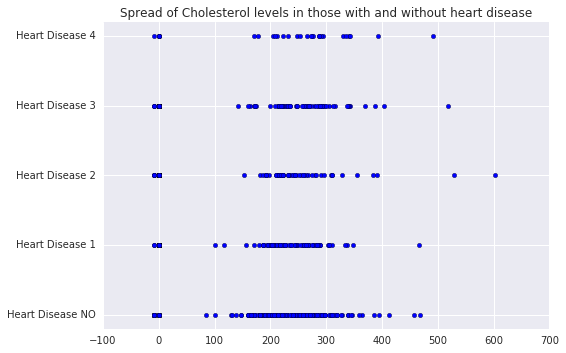

In [32]:
#I'm going to divide the data into two groups - those who developed heart disease and those who didn't.
#I'm just going to explore if there are obvious differences in these features between the two groups. 
chd_pos = df[df.outcome >= 1] 
chd_neg = df[df.outcome == 0]
#Going to look at cholesterol and max HR first
fig = plt.figure()
ax = fig.add_subplot(111)
n=4
ind1=np.arange(pd.value_counts(chd_neg['outcome']))
y = chd_pos['chol'] #, chd_neg['chol']]
x = chd_pos.outcome
ax.scatter(y, x)
ax.scatter(chd_neg['chol'], chd_neg['outcome'], cmap='gray')
ax.set_ylim(-.2,4.2)
ax.set_title('Spread of Cholesterol levels in those with and without heart disease')
yTickMarks = ['', 'Heart Disease NO', 'Heart Disease 1', 'Heart Disease 2', 'Heart Disease 3', 'Heart Disease 4']
ax.set_yticklabels(yTickMarks)
plt.show()

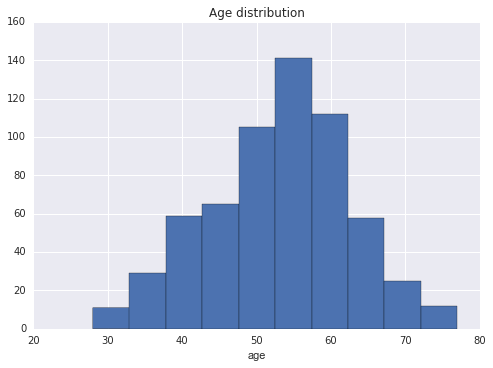

In [33]:
plt.hist(df.age) #Since I imported SNS above, everything now defaults to seaborn style? how do i fix this?
plt.title('Age distribution')
plt.xlabel('age')
#Just getting a feel for the sample in this datset - mean age is around 55

## Task 2: Looking for Null values or missing values - revisited
### Now i've determined there are no null values but there are a lot of "-9"s in lieu of null values. 

In [34]:
#Now I'm exploring some of those columns that seemed to have all negative #s 
#like yrs_smoke, hist_dm, hist_cad, slope, ca, and thal
#I'm going to explore some of this columns with -9s to see if they take up the entire column. 
df.head(5)

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


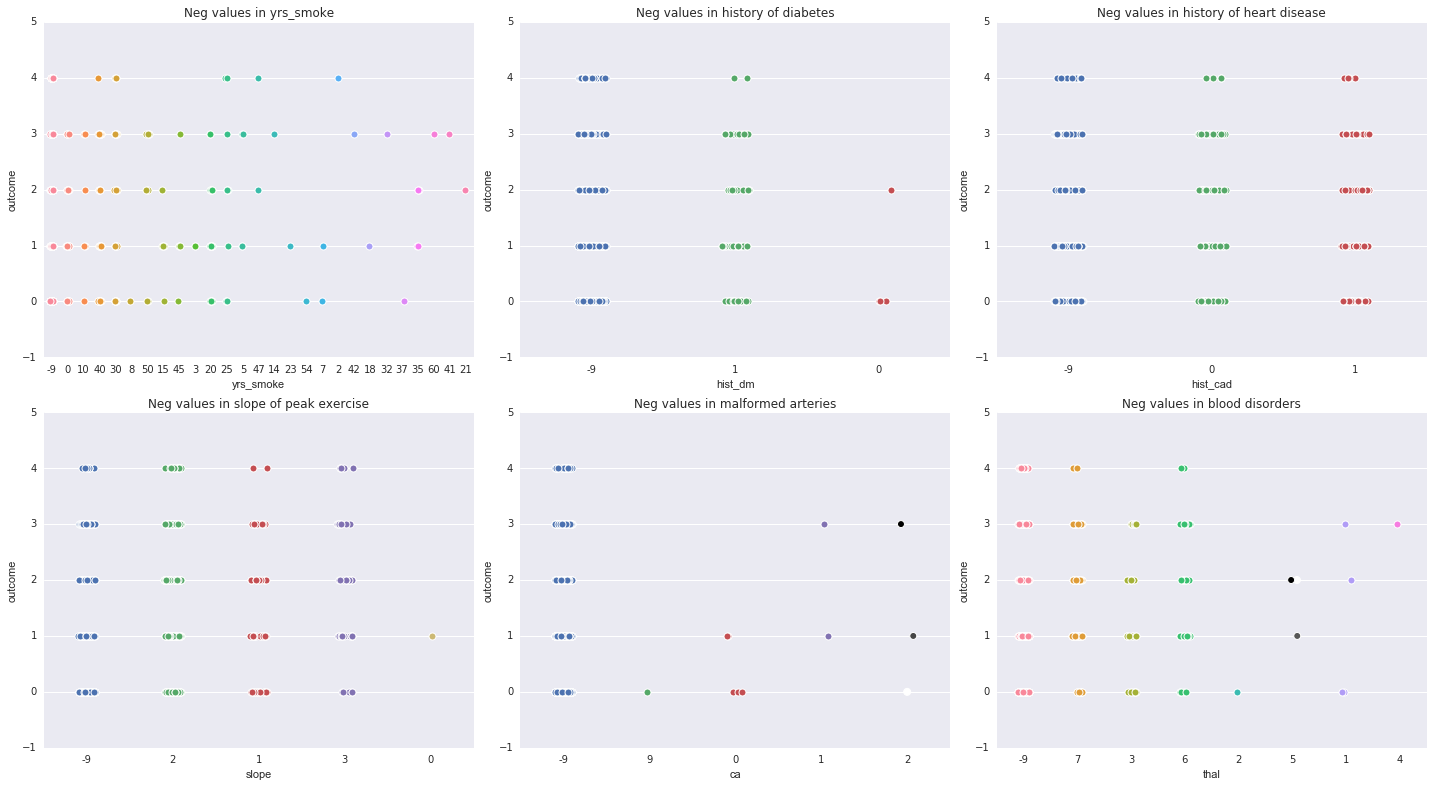

In [35]:
#Exploring columns with neg #s
fig = plt.figure(figsize=(20,16))

ax1 = fig.add_subplot(331)
a1 = sns.stripplot(df.yrs_smoke,df.outcome, jitter=True)
plt.xlabel('yrs_smoke')
plt.ylabel('outcome')
plt.title('Neg values in yrs_smoke') #Why isnt x_axis in ascending order?

ax2 = fig.add_subplot(332)
a2 = sns.stripplot(df.hist_dm,df.outcome, jitter=True)
plt.xlabel('hist_dm')
plt.ylabel('outcome')
plt.title('Neg values in history of diabetes')

ax3 = fig.add_subplot(333)
a3 = sns.stripplot(df.hist_cad,df.outcome, jitter=True)
plt.xlabel('hist_cad')
plt.ylabel('outcome')
plt.title('Neg values in history of heart disease')

ax4 = fig.add_subplot(334)
a4 = sns.stripplot(df.slope,df.outcome, jitter=True)
plt.xlabel('slope')
plt.ylabel('outcome')
plt.title('Neg values in slope of peak exercise')
fig.tight_layout()

ax4 = fig.add_subplot(335)
a4 = sns.stripplot(df.ca,df.outcome, jitter=True)
plt.xlabel('ca')
plt.ylabel('outcome')
plt.title('Neg values in malformed arteries')
fig.tight_layout()

ax4 = fig.add_subplot(336)
a4 = sns.stripplot(df.thal,df.outcome, jitter=True)
plt.xlabel('thal')
plt.ylabel('outcome')
plt.title('Neg values in blood disorders')
fig.tight_layout()

In [36]:
df_copy = df
df_copy['chol'].replace(to_replace=-9, value=0)

0      289
1      180
2      283
3      214
4        0
5      339
6      237
7      208
8      207
9      284
10     211
11     164
12     204
13     234
14     211
15     273
16     196
17     201
18     248
19     267
20     223
21     184
22     201
23     288
24     215
25     209
26     260
27     284
28     468
29     188
      ... 
93       0
94       0
95       0
96       0
97       0
98       0
99       0
100      0
101      0
102      0
103      0
104      0
105      0
106      0
107      0
108      0
109      0
110      0
111      0
112      0
113      0
114      0
115      0
116      0
117      0
118      0
119      0
120      0
121      0
122      0
Name: chol, dtype: int64

## Task4: Check for imbalanced class set. If present, deal with this. 

In [37]:
df.groupby('outcome').size()

outcome
0    247
1    141
2     99
3    100
4     30
dtype: int64

## Task 5: Exploring Models and feature importance

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [41]:
cols = ['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal'] 
# This is all the columns - I havent excluded any yet

In [42]:
features = df[cols]
target = df['outcome']

In [43]:
estimator = LogisticRegression(C=1, multi_class='multinomial', solver='lbfgs')
cross_val_score(estimator, features, target, cv=5) #This means the logistic model is pretty bad, right?
#Is this the best score to determine accuracy? When should i do a train test split?

#This ran 5 times because I specified 5 folds and these values are percentage accuracy?
#By guessing we should be able to predict acurrately 1/k or 20% of the time. The average here is about 50%.

array([ 0.424     ,  0.51612903,  0.45528455,  0.50406504,  0.2704918 ])

In [44]:
estimator1 = LogisticRegression(C=1).fit(features,target)

In [33]:
estimator1.coef_ #There are coefficients for each of the 20 features for each of 5 possible outcomes. 

array([[ -2.90019606e-02,  -1.05573848e+00,  -7.16993569e-01,
          3.05296613e-05,  -9.62264993e-06,  -6.33954167e-03,
          1.00590931e-01,   2.88810967e-03,  -1.32784331e-02,
          2.75855587e-01,   1.43613399e-02,   7.92428508e-03,
         -1.96372095e-03,   1.84741182e-02,  -4.09539462e-01,
          4.59110220e-02,  -1.56559900e-01,   9.36900341e-02,
         -5.91677158e-02],
       [ -1.11556018e-02,  -2.03014709e-02,   4.40021247e-01,
         -2.39984016e-03,  -8.21753883e-05,  -9.75588096e-03,
         -1.17861446e-01,   3.49519383e-02,   1.03701944e-01,
         -1.90949948e-01,   5.55309426e-03,  -4.91499321e-03,
          2.69600508e-03,  -8.11972498e-03,   1.09686020e-01,
         -1.44864653e-01,   6.96577890e-02,   4.59713470e-02,
          2.73070782e-02],
       [ -2.57789781e-02,   6.02822294e-01,   4.38502398e-01,
         -3.62518426e-03,  -1.98224832e-03,   3.08526849e-03,
         -2.89564281e-02,   3.46883774e-02,   4.34022435e-02,
          1.4551

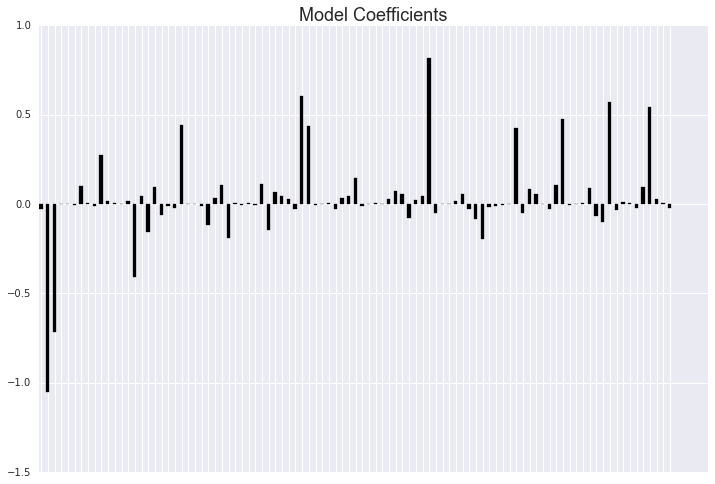

In [35]:
fig = plt.figure(figsize=(12,8)) #Plotting group mean results - I assume the first 20 belong to outcome 0 ,
#the second 20 to outcome 1, and so on? How can I be sure?
ax = fig.add_subplot(111)
width = .5
values = estimator1.coef_.ravel()

ind = np.arange(len(values))
bar_p = plt.bar(ind, values, width, color = 'black')

ax.set_title('Model Coefficients', fontsize=18)
xTickMarks = ['']
ax.set_xticks(ind+.3)
ax.set_xlim(-.1)
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=18)

In [49]:
# split into train/test
from sklearn.cross_validation import train_test_split
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [52]:
estimator.fit(X_train, y_train) 

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
# make predictions
preds = estimator.predict(X_test)
print preds
print np.array(y_test)  ## Is there a way to compare each prediction to its respective actual value?

[1 0 0 0 0 0 0 0 3 3 0 0 3 0 0 0 3 3 3 3 0 0 3 0 3 3 0 0 1 3 2 1 4 0 0 0 0
 1 0 0 0 3 0 0 0 0 0 3 1 0 1 3 1 3 3 3 0 3 1 0 1 3 1 0 0 0 3 0 0 0 1 1 0 4
 3 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 3 3 0 0 1 1 0 3 3 1 1 3 0 3 1 0 1 0 3 1 0
 1 0 1 0 1 3 0 3 0 0 0 1 1 1 2 0 0 0 3 3 1 1 0 0 0 0 0 3 0 0 0 0 0 0 0 2 0
 2 1 1 0 0 0 0]
[0 3 0 0 3 0 0 0 2 2 2 3 3 0 3 0 1 4 2 2 0 1 4 0 1 2 0 1 1 1 1 0 3 0 1 0 3
 0 0 0 0 0 0 0 0 0 1 3 2 0 3 2 1 2 2 1 3 3 1 1 2 3 1 1 2 1 3 0 0 4 3 2 0 3
 3 3 0 0 0 2 2 1 3 1 0 1 0 1 3 3 2 2 0 0 1 2 0 3 2 3 1 4 0 1 1 0 1 3 2 3 0
 0 0 3 3 0 3 1 3 3 0 0 1 2 2 2 0 0 0 1 1 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 2 1
 0 0 1 0 0 2 2]


In [54]:
## I'm investigating other metrics instead of cross_val_score since its a harsh metric
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(y_test, preds)) 

1.2598002913928654

In [60]:
conf = metrics.confusion_matrix(y, estimator.predict(X))
print conf

[[208  19   1  16   3]
 [ 55  59   3  23   1]
 [ 29  33   4  31   2]
 [ 29  23   1  43   4]
 [ 13   3   1  11   2]]


In [116]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



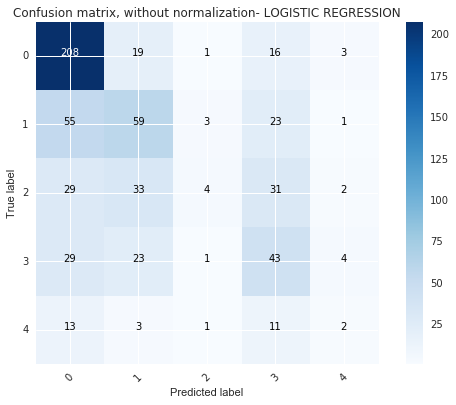

In [117]:
class_names = [0,1,2,3,4]
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization- LOGISTIC REGRESSION')


In [118]:
## NOw trying decision tree
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [119]:
preds_tree = treeclf.predict(X_test)

In [120]:
np.sqrt(metrics.mean_squared_error(y_test, preds_tree)) 
#So based on the RMSE, this isn't necessarily better the rmse of logistic regression (1.29).
# Maybe not the best metric

1.5491933384829668

In [111]:
#try the confusion matrix with the tree
conf_tree = metrics.confusion_matrix(y, treeclf.predict(X))
print conf_tree

[[227   9   4   5   2]
 [  9 122   5   4   1]
 [  5   7  79   5   3]
 [  5  10   2  80   3]
 [  1   0   1   2  26]]


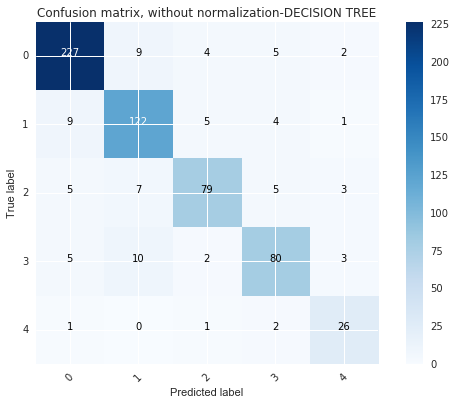

In [112]:
plt.figure()
plot_confusion_matrix(conf_tree, classes=class_names,
                      title='Confusion matrix, without normalization-DECISION TREE')

#So its definitly better than logistic regression

In [113]:
#Trying to visualize the tree. Got a graphic out, having trouble showing it here but can be
# found at ''. Not sure what it means

feature_cols = features.columns[:]
from sklearn.tree import export_graphviz
with open("tree.dot", 'wb') as f:
    f = export_graphviz(treeclf, out_file=f, feature_names=feature_cols)
    
# to convert dot to png; run from command line: dot -Tpng tree.dot -o 15_tree.png


<img src="~/Desktop/Sheenas_Code/Springboard_Intensive/Capstone_project/tree.png">

In [97]:
#now trying hyperparameter optimization

PARAMETERS = {'max_depth':[1,2,3,4,5,6], 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4],
              'min_samples_split':[1,2,3,4]}
SCORING = 'mean_squared_error'

from sklearn import grid_search

#Grid Search
model = DecisionTreeClassifier()
clf = grid_search.GridSearchCV(model, PARAMETERS, scoring=SCORING, verbose=True, n_jobs=1)
clf.fit(X, y)

#After completion, show the final best results and scores
print clf.best_estimator_
print clf.best_score_
print np.sqrt(-clf.best_score_)

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    3.4s
[Parallel(n_jobs=1)]: Done 1249 tasks       | elapsed:    5.2s
[Parallel(n_jobs=1)]: Done 1799 tasks       | elapsed:    7.7s
[Parallel(n_jobs=1)]: Done 2449 tasks       | elapsed:   10.4s
[Parallel(n_jobs=1)]: Done 3199 tasks       | elapsed:   14.0s
[Parallel(n_jobs=1)]: Done 4049 tasks       | elapsed:   18.0s
[Parallel(n_jobs=1)]: Done 4999 tasks       | elapsed:   22.4s
[Parallel(n_jobs=1)]: Done 6049 tasks       | elapsed:   27.0s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=3, max_leaf_nodes=8, min_samples_leaf=2,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
-1.61426256078
1.270536328


[Parallel(n_jobs=1)]: Done 6912 out of 6912 | elapsed:   31.0s finished
